## Bellabeat Case Study
How can a wellness technology company play it smart?

**Table of Contents**
* [Introduction](#Introduction)
* [Ask](#Ask)
* [Prepare](#Prepare)
* [Process](#Process)
* [Analyse](#Analyse)
* [Share](#Share)
* [Act](#Act)

<a id="Introduction"></a>
# **Introduction**
This capstone is part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/learn/google-data-analytics-capstone) which consists of two optional case studies. You can also find my take on case study 1 [here](https://www.kaggle.com/dprerona/cyclistic-google-data-analytics-capstone). Similar to the previous case study, I will be using the six phases of Data Analysis: Ask, Prepare, Process, Analyse, Share, Act.

**About The Company**

[Bellabeat](https://bellabeat.com/) is a high-tech manufacturer of health-focused products for women.Bellabeat’s app and multiple smart devices collect data on activity, sleep, stress, hydration levels, and reproductive health to empower women with an understanding of their own health and habits. The company was founded in 2013 by Urška Sršen and Sando Mur and has expanded quickly since, now with the possibility to become a greater player in the global smart device market.

**Business Task**

The task here is to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. I will be focusing on **Bellabeat App** which provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

<a id="Ask"></a> 
# **Phase 1: Ask**
The following questions will be helpful in guiding through the analysis:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

<a id="Prepare"></a>
# **Phase 2: Prepare**
The data used for this analysis is [Fitbit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) on Kaggle. It'stored in 18 CSV files and was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016–05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
Some of the limitations of the data include:
* Small sample size (30 users only)
* Short time span (survey distribution for 1 month only)
* Outdated (data from 2016)
* Missing key attributes such as Gender, Age, Lifestyle etc.

**Data used**

The following files have been selected and downloaded for analysis;

*dailyActivity_merged.csv*

*sleepDay_merged.csv*

*weightLogInfo_merged.csv*

I have utilised a combination of Excel, Python(Jupyter Notebook) and Power BI for transforming and analysing the data.

<a id="Process"></a>
# **Phase 3: Process**
In this phase, I have used Excel to observe and clean the data. There were more than 30 entries which means some users may have more than one account. All of the datasets have a similar id column. I have also formatted the datetime column for easier analysis. Then, I checked for null and duplicate values and renamed the files as 'daily_activity', 'sleep_day'and 'weight_log_info'. 

<a id="Analyse"></a>
# **Phase 4: Analyze**

 I have explored the data further and analysed it using descriptive statistics on Python.

**Code**

In [ ]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd

# Importing all the datasets and storing them in dataframes
df1 = pd.read_csv(r"../input/bellabeat-data/daily_activity.csv")
df2 = pd.read_csv(r"../input/bellabeat-data/sleep_day.csv")
df3 = pd.read_csv(r"../input/bellabeat-data/weightlog_info.csv")

In [ ]:
# Checking the daily activity file
df1.head()

In [ ]:
# Checking the sleep day file
df2.head()

In [ ]:
# Checking the weight log file
df3.head()

**Transforming and Analysing Activity Data(df1)**

I have created columns to find total hours, total minutes and day of the week. Furthermore, I have summarised the data using descriptive statistics.


In [ ]:
# Calculating total minutes
df1['TotalMinutes'] = df1['VeryActiveMinutes'] + df1['FairlyActiveMinutes'] + df1['LightlyActiveMinutes'] + df1['SedentaryMinutes']

In [ ]:
# Converting minutes to hours
df1['TotalHours'] = round(df1['TotalMinutes']/60, 2)

In [ ]:
# Finding day of the week
df1['Date'] = pd.to_datetime(df1['Date'])
df1['DayofWeek'] = df1['Date'].dt.day_name()

In [ ]:
# Checking the data once more
df1.head(6)

In [ ]:
# Conducting Summary statistics on daily activity data
df1.describe()

**Observations:**

* As we can see, users took around 7,638 steps or 5.4 kilometers on average which is insufficient according to the Centers for Disease Control and Prevention who reccomend 10,000 steps for health.
* On average users spent around 21 minutes very actively where as 991 minutes (16.5 hours) being sedentary. This is a huge difference and can be lead to health issues.
* The average number of calories burned is 2,304 which is 0.6 pounds. 

**Merging All Three Datasets**

I have decided to merge the datasets on 'Id' column in order to gain insights and draw visualizations.


In [ ]:
# Merging daily activity dataset with sleep day data
dfm = pd.merge(df1,df2, on= 'Id')

In [ ]:
# Merging sleep_day dataset with weight_log_info
df = pd.merge(dfm,df3, on= 'Id')
df.head()

In [ ]:
# Summarising the combined data for statistical analysis
df.describe()

**Observations:**
* Users were getting 437 minutes of sleep which is roughly around 7 hours. This is great considering that [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html) reccommends an adult between 18–60 years old to get 7 or more hours of sleep per night.
* As observed, the average bmi is 24.4 which means that most of the users are having normal weight. 

<a id="Share"></a>
# **Phase 5: Share**

For the share phase, I have created visualizations using Power BI to present the findings.

**Calories Burned for every hour logged time**

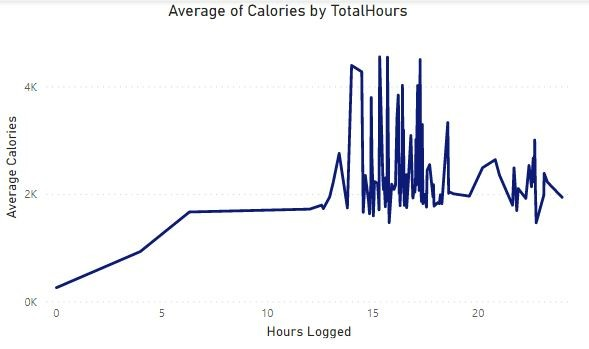

By observing the graph, we can see that with increasing number of logged hours, the average calories burned have also increased. 

**Total Steps vs Calories**

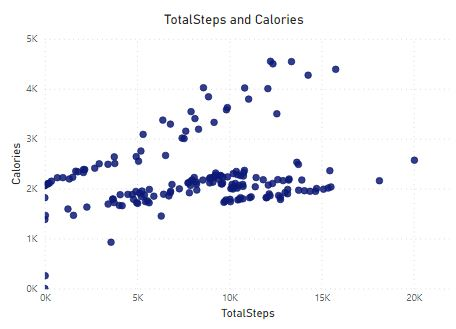

In the scatter plot, we can observe that there is a positive correlation between the total number of steps taken and the calories burned. The data also seems to have few outliers since it shows observations at 0 steps.

**Calories Burned and Activity Minutes**

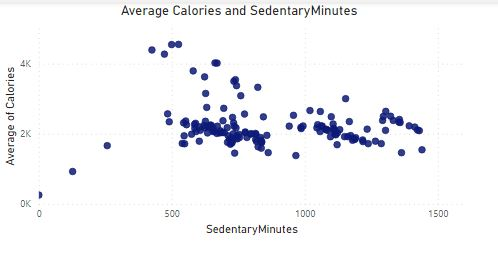
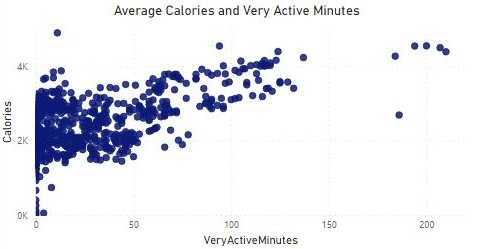

Based on these graphs, it can be concluded that the average calories burned are related to the time they spend on activities. When users are active, they burn more calories where as it reduces when users are in sedentary position.

**Further Analysis**

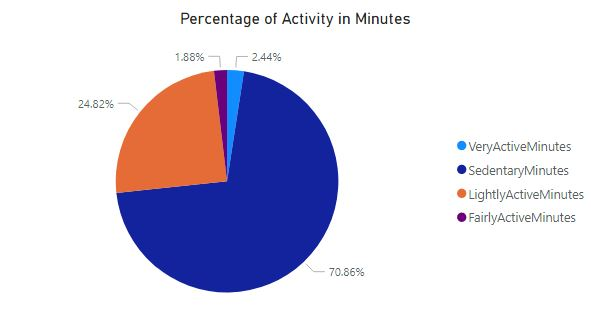

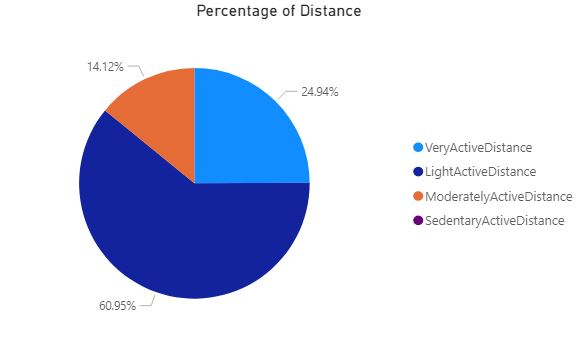

**App Usage Trends**

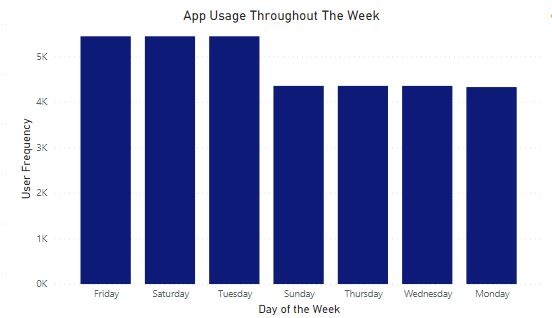

It can be observed from this graph that majority of the users have logged in the app mostly on Friday and Saturday with an exception on Tuesday. This could mean that they get more time and are generally more active by the end of the week.

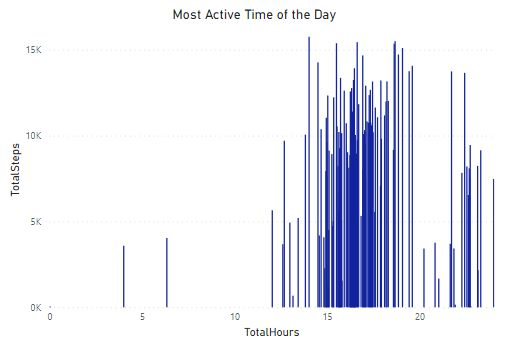

This bar graph tells us that the users tend to start becoming more active between 10am and 3pm. Furthermore, the peak hours seem to occur between 3pm and 7pm.  There are some users whose activities are recorded after 8pm. This might include people who are awake in bed.


<a id="Act"></a>
# **Phase 6: Act**

 **Conclusions and Reccomendations**

Based on the above findings, here are some suggestions to improve bellabeat's marketing:
1. **Personalised Notifications** - Since there is a positive relationship between total steps and active minutes with calories burned, bellabeat could incorporate personalized notifications on its app to motivate users to move around throughout the day. These notifications could include information such as  the number of steps taken so far, or even the number of steps left in order to reach the daily goal.
2. **Short Workout Routines** - Majority of the fitness users have been recorded in sedentary behaviour. Hence, bellabeat app could provide short workout routines to encourage users to be more active and ultimately maintaining a healthy lifestyle.
3. **Recording Sleep Logs** - Bellabeat could also keep a feature in the app which records user's sleeping patterns. The feature will help users understand sleep quality, the number of times one wakes up during the night, the total amount of awake time in bed etc.
4. **Motivational Quotes and Videos** - Every now and then, the bellabeat app could share motivational quotes, videos and reminders to further encourage its users.
5. **Discounts on Other Bellabeat Wellness Products and Services** - Another way to keep customers motivated is to offer special discounts on the different Bellabeat products, as well as their premium membership. This way, the users could become more inclined to get more active and purchase more products from the company.